In [1]:
%load_ext autoreload


In [8]:
%autoreload 2

In [9]:

# Import necessary libraries
import pandas as pd
import os
import sys
sys.path.append("../scripts/")  # Add the scripts folder to the path

from data_collection import fetch_brent_data
from data_preprocessing import preprocess_data
from eda import plot_prices, plot_acf_pacf
from modeling import fit_arima_model, fit_lstm_model


In [10]:

# Step 1: Data Collection
file_path = '../data/BrentOilPrices.csv' 
brent_data = fetch_brent_data(file_path)
brent_data.head()



,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [11]:
print(brent_data.isnull().sum())

Price    0
dtype: int64


In [12]:

# Step 2: Data Preprocessing
brent_data = preprocess_data(brent_data)


c:\Users\Tsebaot\Desktop\week 10\brent-oil-price-analysis\notebooks\../scripts\data_preprocessing.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  brent_data.fillna(method='ffill', inplace=True)


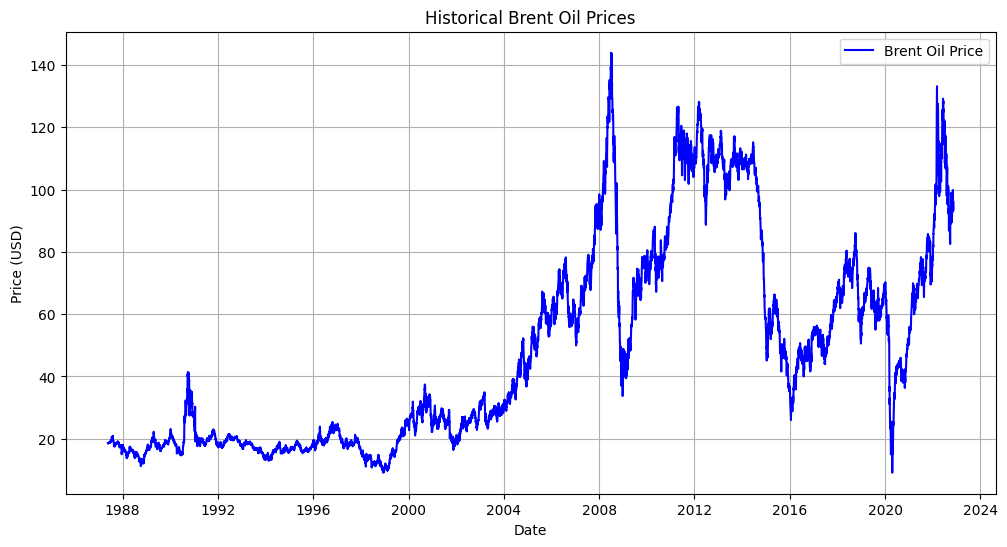

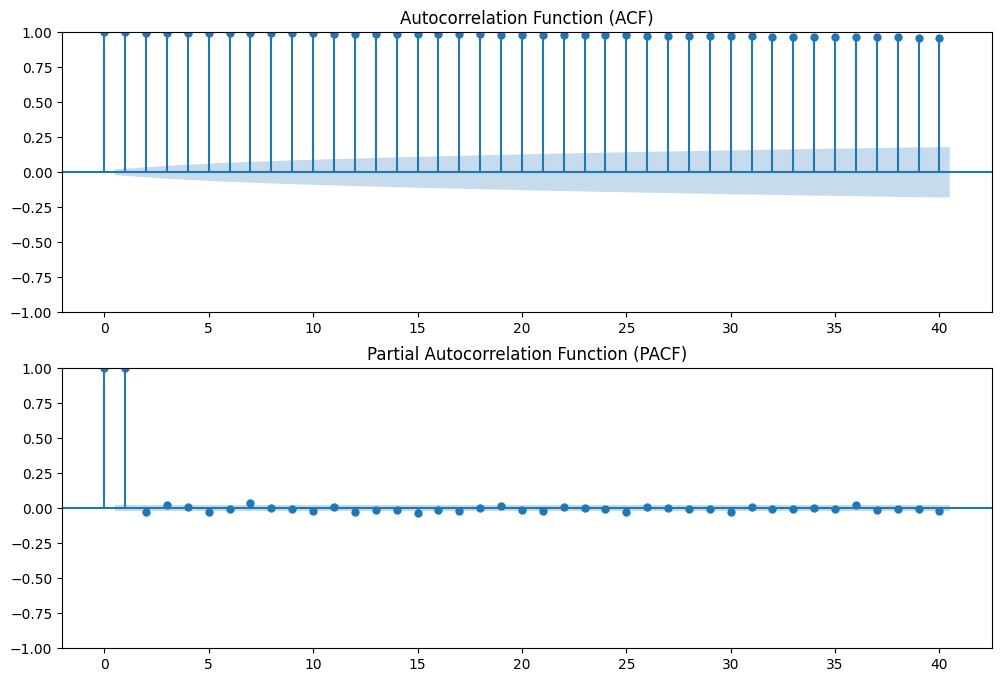

In [13]:

# Step 3: Exploratory Data Analysis (EDA)
plot_prices(brent_data)
plot_acf_pacf(brent_data)




In [14]:
# Step 4: Model Selection and Fitting
model_fit = fit_arima_model(brent_data)

# Output the model summary
print(model_fit.summary())

c:\Users\Tsebaot\Desktop\week 10\brent-oil-price-analysis\week-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Tsebaot\Desktop\week 10\brent-oil-price-analysis\week-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Tsebaot\Desktop\week 10\brent-oil-price-analysis\week-10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Mon, 10 Mar 2025   AIC                          29093.899
Time:                        21:18:52   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0